**Autoencoders**

Compacta e descompacta imagens

Autoencoders lineares: Imagem -> redução das imagens -> Reconstruir imagens;

Autoencoders convolucionais: Utilizam redes neurais convolucionais para gerar as imagens novamentes

Camada de entrada > Camada oculta > Camada de saída -> Todos os nós são dados como entrada.

O algoritmo de autocodifica automaticamente. Semelhante a criptografia. 
A técnica busca reduzir as entradas.

Flui da esquerda para a direita: Camada entrada para a camada de saída. Ele é um algoritmo de aprendizagem supervisionada por ele mesmo.

Número de entradas = Número de saídas.

**Tipos de autoencoders**

- Sparse autoencoder: usa regularização para pervenir overfitting, não usa todos os neurônios da camada de oculta;
- Denoising autoencoder: Modifica os valores da camada de entrada, alterando alguns neurônios para o valor zero.
- Contractive autoencoder: Adiciona uma função de penalidade quandos os pesos são atualizados. Faz o backpropagation;
- Deep/Stack autoencoder: Vai diminuindo a quantidade de neurônios nas camadas conforme chega ao meio da rede. 
- Convolutional autoencoder: Baseado em redes neurais convolucionais. 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [6]:
# Qtd de pixels da imagem
28*28

784

6


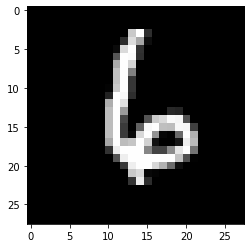

In [14]:
i = np.random.randint(0, X_treinamento.shape[0])
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray')

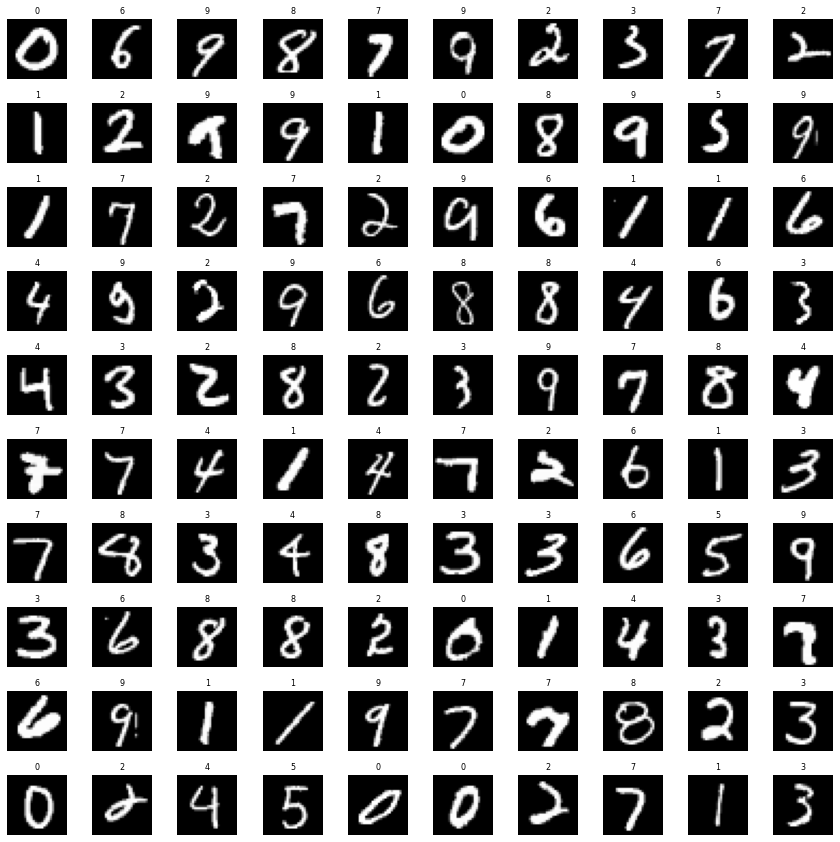

In [17]:
# Plot de várias imagens
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))

axes = axes.ravel()

for i in np.arange(0, 100):
  indice = np.random.randint(0, X_treinamento.shape[0])
  axes[i].imshow(X_treinamento[indice], cmap='gray')
  axes[i].set_title(y_treinamento[indice], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

**Pré-processamento das imagens**

A normalização ajuda a diminuir o tempo de processamento da rede.

In [18]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255 

In [19]:
# Convertendo os pixels em formato de matriz para o formato de vetor
# Convertendo vetor em matriz

X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], X_treinamento.shape[1] * X_treinamento.shape[2]) 
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2]) 

**Construção do autoencoder**

Será construído um deep autoencoder

In [21]:
autoencoder = Sequential()

# Codificação
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Imagem codificada

# Decodificação
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid')) # Função diferente

In [22]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [24]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
autoencoder.fit(X_treinamento, X_treinamento, epochs = 50) # Os pixels da camada de entrada tem que ser o mais próximo possível dos pixels da camada de saída

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1513 - accuracy: 0.0100
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.0109
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.0120
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0962 - accuracy: 0.0124
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.0132
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0914 - accuracy: 0.0133
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.0139
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.0133
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.0132
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.086

**Codificação das imagens**

In [27]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [28]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


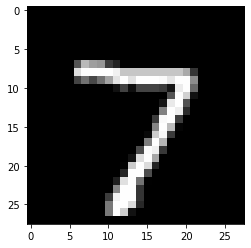

In [29]:
plt.imshow(X_teste[0].reshape(28,28), cmap = 'gray')

In [30]:
# Formato necessário para enviar os dados para a rede
X_teste[0].reshape(1, -1).shape

(1, 784)

In [38]:
imagem_codificada = encoder.predict(X_teste[0].reshape(1,-1))

In [39]:
imagem_codificada.shape

(1, 32)

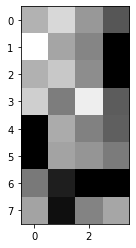

In [40]:
# Representação da imagem codificada
plt.imshow(imagem_codificada.reshape(8,4), cmap = 'gray')

**Decodificação da imagem**

In [35]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [36]:
input_layer_decoder = Input(shape = (32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [41]:
imagem_decodificada = decoder.predict(imagem_codificada)

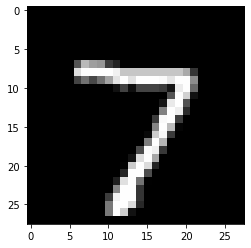

In [42]:
plt.imshow(X_teste[0].reshape(28,28), cmap = 'gray')

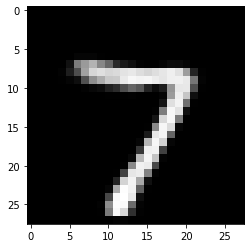

In [43]:
plt.imshow(imagem_decodificada.reshape(28,28), cmap = 'gray')

**Codificação e decodificação das imagens de teste**

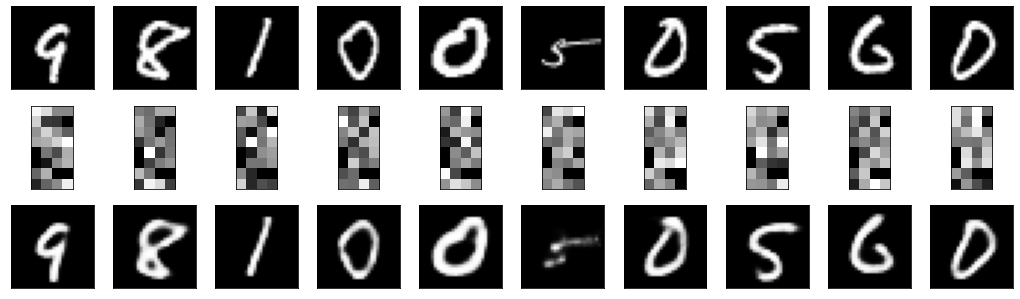

In [53]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))

for i, imagem_indice in enumerate(imagens_teste):
  # Imagens originais
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10, 10, i + 1 + numero_imagens)
  imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1,-1))
  plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  imagem_decodificada = decoder.predict(imagem_codificada)
  plt.imshow(imagem_decodificada.reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())